In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

# Machine learning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
# prompt: ler csv

data = pd.read_csv("/tabela_iot.csv")


In [ ]:
data.head()

,M1,0.65400000000000003,25.199999999999999,35.600000000000001,2023-01-28 13:55:33.807,2023-01-28 13:55:33.8070000 -03:00
0,M1,1.619094,40.486275,35.624397,2024-02-20 09:25:01.140,2024-02-20 09:25:01.1390000 -03:00
1,M1,2.131094,40.998276,36.136398,2024-02-20 09:25:08.617,2024-02-20 09:25:08.6150000 -03:00
2,M1,2.387094,41.254276,36.392399,2024-02-20 09:25:13.617,2024-02-20 09:25:13.6150000 -03:00
3,M1,0.339094,39.206276,34.344398,2024-02-20 09:25:23.620,2024-02-20 09:25:23.6210000 -03:00
4,M1,1.363094,40.230274,35.368397,2024-02-20 09:25:43.633,2024-02-20 09:25:43.6340000 -03:00


In [ ]:
data.shape

(1839, 6)

In [ ]:
# prompt: definir nome das colunas do arquivo csv

data.columns = ['TAG','VIBRACAO', 'CORRENTE', 'TEMP', 'DATA', 'DATA_OFFSET']


In [ ]:
data.head()

,TAG,VIBRACAO,CORRENTE,TEMP,DATA,DATA_OFFSET
0,M1,1.619094,40.486275,35.624397,2024-02-20 09:25:01.140,2024-02-20 09:25:01.1390000 -03:00
1,M1,2.131094,40.998276,36.136398,2024-02-20 09:25:08.617,2024-02-20 09:25:08.6150000 -03:00
2,M1,2.387094,41.254276,36.392399,2024-02-20 09:25:13.617,2024-02-20 09:25:13.6150000 -03:00
3,M1,0.339094,39.206276,34.344398,2024-02-20 09:25:23.620,2024-02-20 09:25:23.6210000 -03:00
4,M1,1.363094,40.230274,35.368397,2024-02-20 09:25:43.633,2024-02-20 09:25:43.6340000 -03:00


In [ ]:
# prompt: dropar coluna tag e data, transformar data_offset em date time e passar para o indice

data = data.drop(columns=['TAG','DATA_OFFSET'])
data['DATA'] = pd.to_datetime(data['DATA'])
data = data.set_index('DATA')
data.head()


,VIBRACAO,CORRENTE,TEMP
DATA,,,
2024-02-20 09:25:01.140,1.619094,40.486275,35.624397
2024-02-20 09:25:08.617,2.131094,40.998276,36.136398
2024-02-20 09:25:13.617,2.387094,41.254276,36.392399
2024-02-20 09:25:23.620,0.339094,39.206276,34.344398
2024-02-20 09:25:43.633,1.363094,40.230274,35.368397


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1839 entries, 2024-02-20 09:25:01.140000 to 2024-02-20 11:12:59.473000
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   VIBRACAO  1839 non-null   float64
 1   CORRENTE  1839 non-null   float64
 2   TEMP      1839 non-null   float64
dtypes: float64(3)
memory usage: 57.5 KB


## Data Cleaning

There are a few issues we need to address with the data. First, we'll drop the duplicated rows, then we'll drop any rows that contain a `nan`. Finally, we can add a `Boolean` column indicating whether or not an order is a cancellation.

In [ ]:
data.isnull().sum()

VIBRACAO    0
CORRENTE    0
TEMP        0
dtype: int64

In [ ]:
# prompt: IDENTIFICAR A SOMA DE NÚMEROS ZEROS POR COLUNA

data.eq(0).sum()


VIBRACAO    1296
CORRENTE    1296
TEMP           1
dtype: int64

In [ ]:
# prompt: DROPAR AS LINHAS QUE TEM NÚMERO ZERO

data = data.loc[data['VIBRACAO'] != 0]
data = data.loc[data['CORRENTE'] != 0]
data = data.loc[data['TEMP'] != 0]
data.eq(0).sum()


VIBRACAO    0
CORRENTE    0
TEMP        0
dtype: int64

In [ ]:
data.head()

,VIBRACAO,CORRENTE,TEMP
DATA,,,
2024-02-20 09:25:01.140,1.619094,40.486275,35.624397
2024-02-20 09:25:08.617,2.131094,40.998276,36.136398
2024-02-20 09:25:13.617,2.387094,41.254276,36.392399
2024-02-20 09:25:23.620,0.339094,39.206276,34.344398
2024-02-20 09:25:43.633,1.363094,40.230274,35.368397


In [ ]:
data.shape

(543, 3)

In [ ]:
#summary statitics for the new data
data.describe()

,VIBRACAO,CORRENTE,TEMP
count,543.000000,543.000000,543.000000
mean,1.520791,57.179235,39.420968
std,0.739756,16.610291,3.932423
min,0.339094,25.200000,34.344398
25%,0.857282,42.874828,36.045193
50%,1.440000,44.154831,37.069195
75%,2.137282,76.279999,43.779999
max,2.720000,77.559998,45.060001


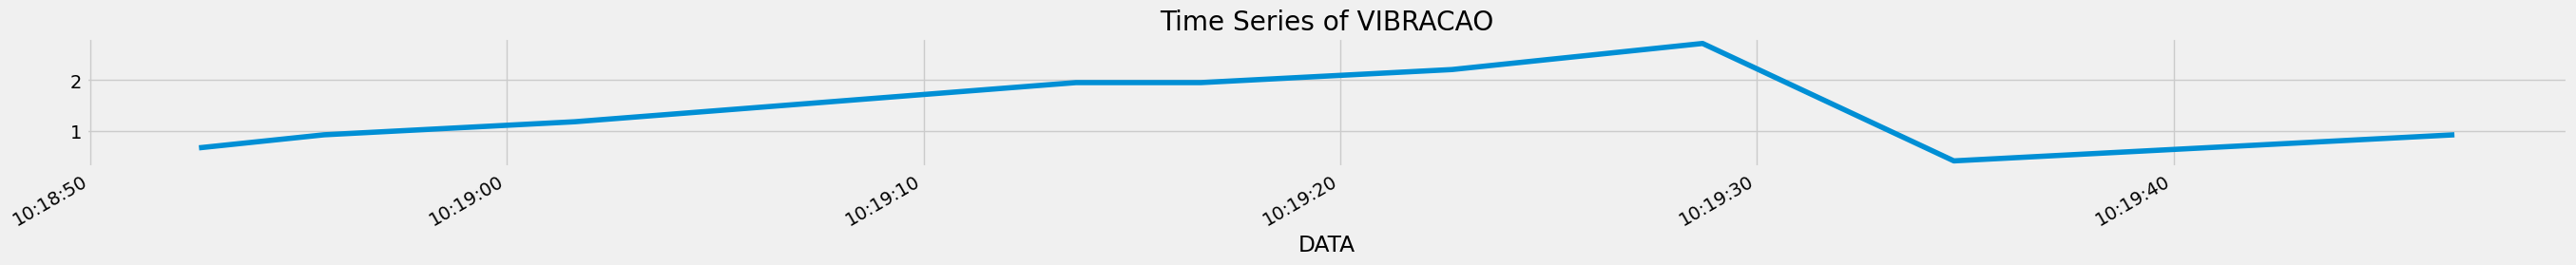

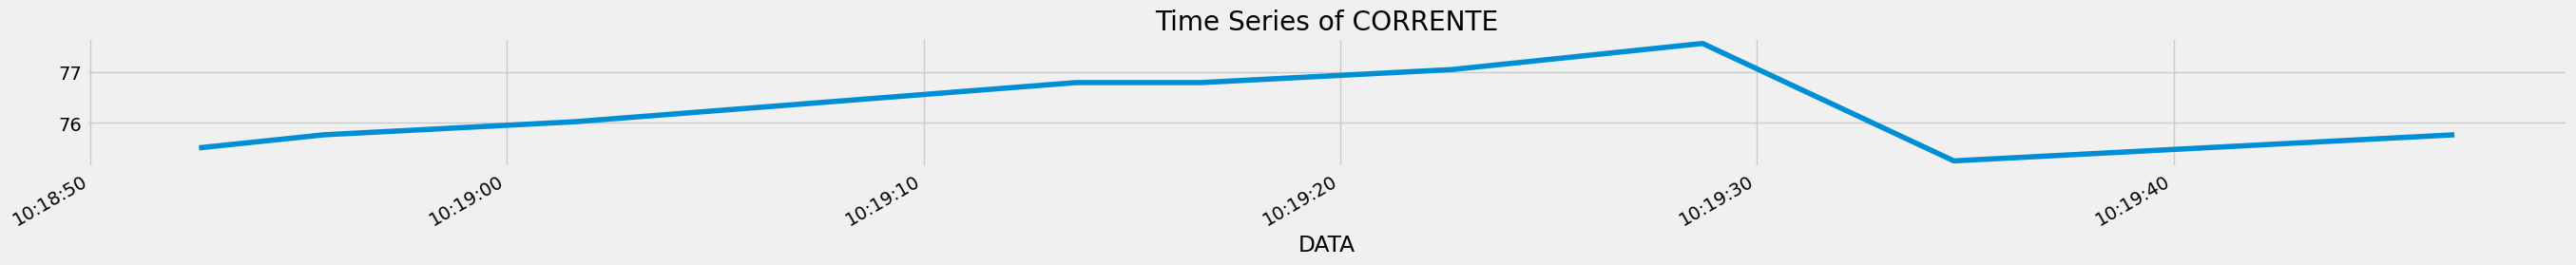

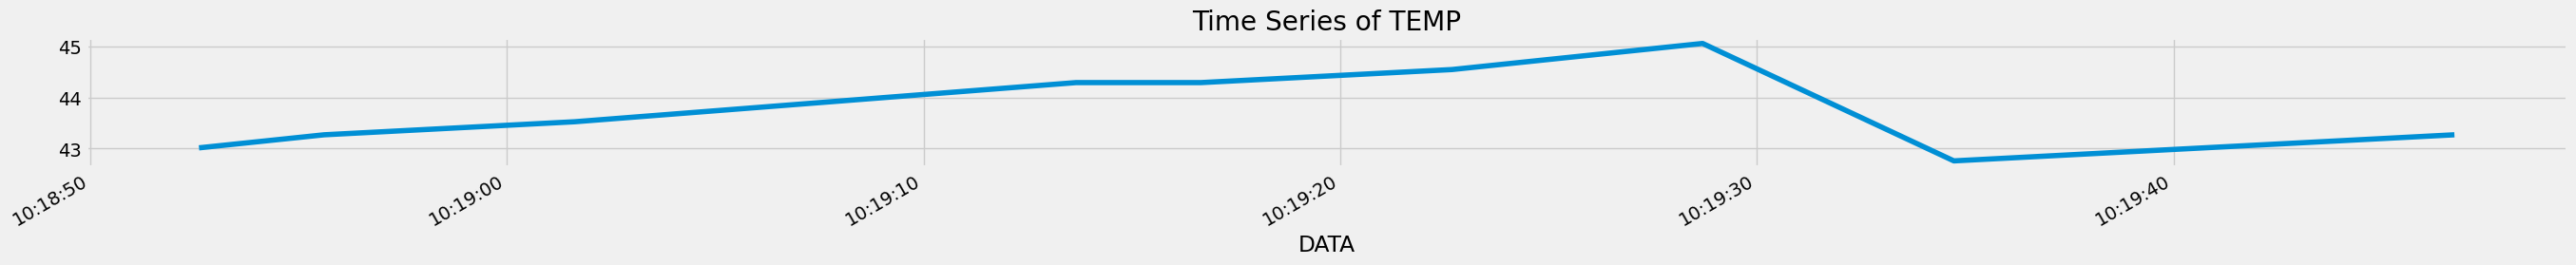

In [ ]:
#plotar time series das ultimas 50 linhas de cada variavel

for column in data.columns:
    data[column].iloc[-10:].plot(figsize=(30, 2))
    plt.title(f"Time Series of {column}")
    plt.show()


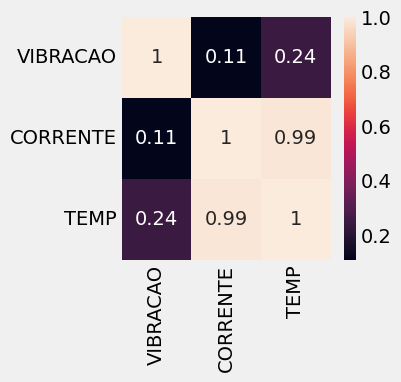

In [ ]:
# prompt: Plotar Coreelação

# Correlation plot
plt.figure(figsize=(3, 3))
sns.heatmap(data.corr(), annot=True)
plt.show()


Mean Squared Error: 1.791147091062942e-06
R2 Score: 0.9999968376854237


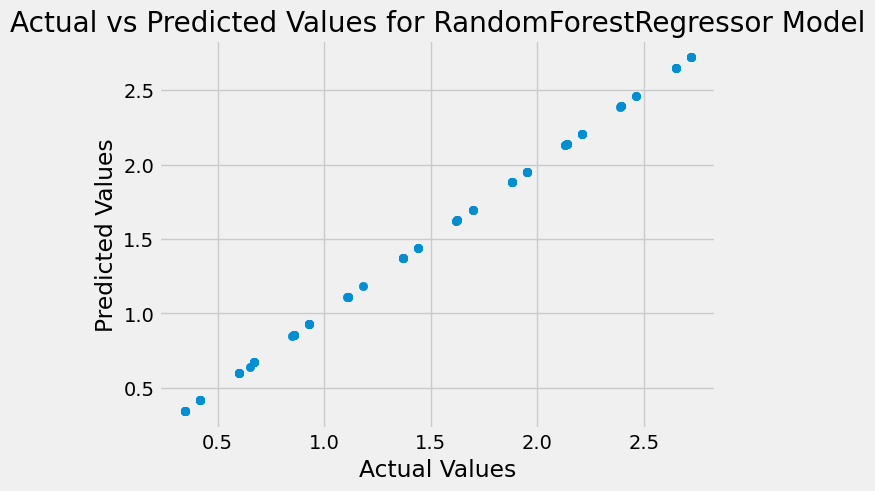

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, data['VIBRACAO'], test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for RandomForestRegressor Model')
plt.show()

Mean Squared Error: 0.00034144251446289244
R2 Score: 0.9994139484374205


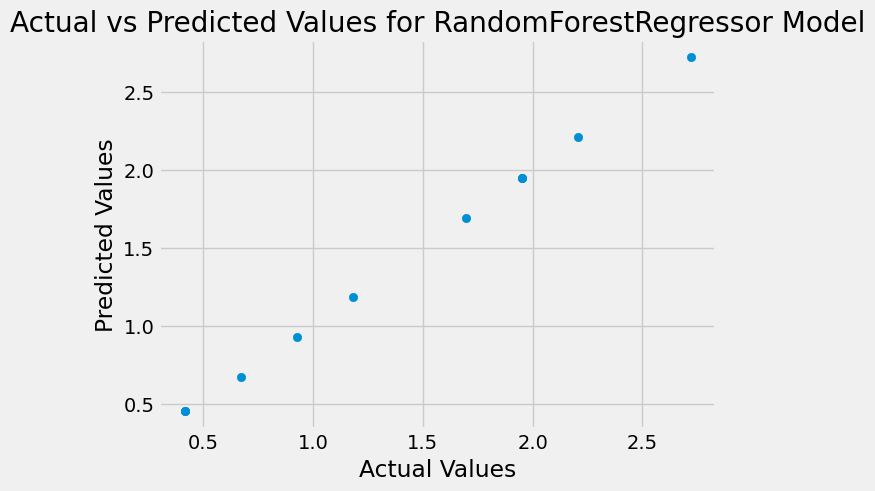

In [ ]:
# Select the last 50 rows of the data
data = data.tail(50)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, data['VIBRACAO'], test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for RandomForestRegressor Model')
plt.show()

Mean Squared Error: 0.00019202674661875004
R2 Score: 0.9996704055734875


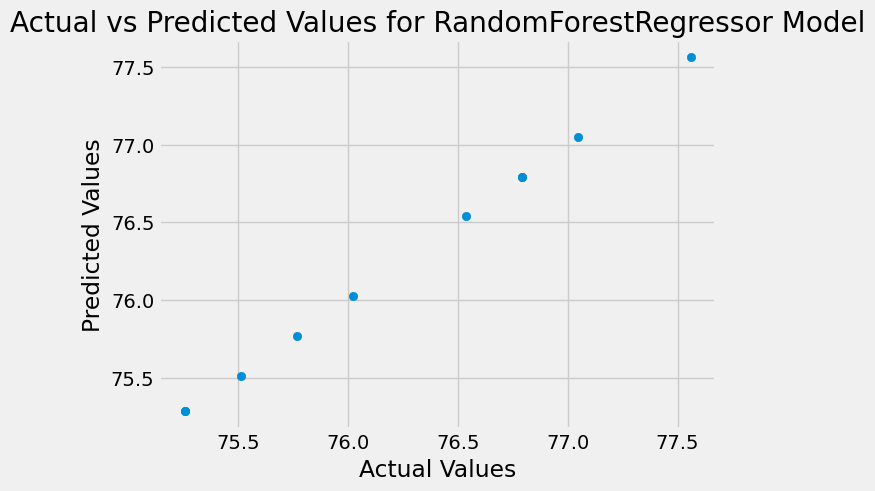

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, data['CORRENTE'], test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for RandomForestRegressor Model')
plt.show()

Mean Squared Error: 0.00014745657812573014
R2 Score: 0.9997469056011388


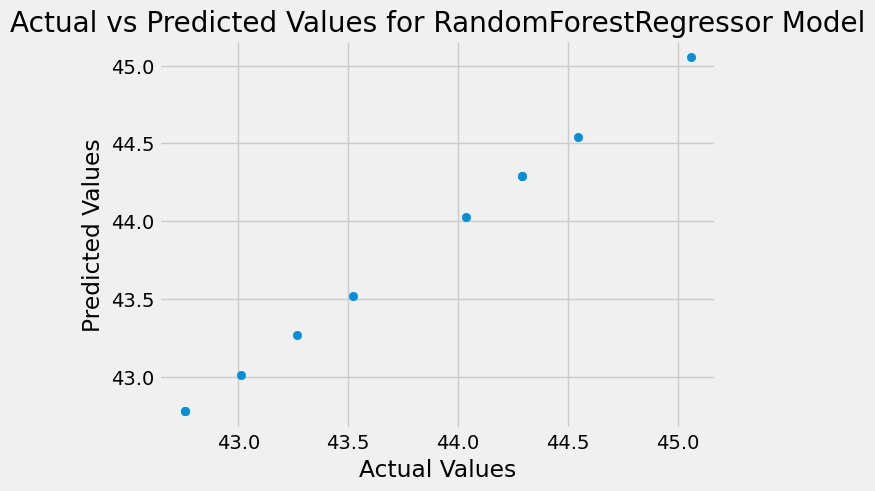

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, data['TEMP'], test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for RandomForestRegressor Model')
plt.show()